# 제주도 위도-경도 DataFrame 생성

## mapshaper.org를 이용하여 shp파일 변환

- shp파일 출처
    - 국토교통부 국가공간정보포털
    - http://data.nsdi.go.kr/dataset/15145

## load library

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

## open json file

In [2]:
with open('./jeju.json', encoding='utf8') as f:
    geo=json.load(f)

In [103]:
with open('./new_geojson.json', encoding='utf8') as f:
    geo=json.load(f)

In [126]:
ll,ll2=np.array(geo['features'][4]['geometry']['coordinates'][0]).reshape(-1,2)[0]
ll,ll2

(126.16878920043702, 33.282515843115476)

In [112]:
size=[]
for i in range(len(geo['features'])):
    size.append(len(geo['features'][i]['geometry']['coordinates']))

In [117]:
pd.Series(size)

0     1
1     1
2     1
3     1
4     2
     ..
69    1
70    1
71    1
72    1
73    1
Length: 74, dtype: int64

In [116]:
geo['features']

[{'type': 'Feature',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[126.6534189957997, 33.39505492393853],
     [126.65670957203832, 33.39207353890423],
     [126.67323677835506, 33.384780040773265],
     [126.67420391513234, 33.37900656134664],
     [126.68164682688979, 33.37542827487201],
     [126.6851497794659, 33.37729594911281],
     [126.69563902199803, 33.37402486104097],
     [126.7018701482655, 33.37636386868288],
     [126.713604800315, 33.37210921688195],
     [126.7207431091246, 33.37125364102059],
     [126.73516786611357, 33.36483953835888],
     [126.74135956953891, 33.35695796343614],
     [126.74237844782422, 33.35301426949628],
     [126.74952430644568, 33.347988501819636],
     [126.75184140331734, 33.34209037343916],
     [126.75608147802579, 33.33986563131102],
     [126.75895588123488, 33.333634589390904],
     [126.76163219405909, 33.31801319017678],
     [126.76436412935436, 33.31779793887654],
     [126.7698972672798, 33.3107889956803],
     [126.77599

In [38]:
len(geo['features'])

74

## data preprocessing

- 각 geo['features'] 리스트에 읍면동 단위 저장
- 읍면동 이름 features-properties-EMD_NM
- 위도-경도 경계선 features-geometry-coordinates

### 제주시, 서귀포시 내 동은 시명으로 변환
### 읍면은 관할 시 + 읍면으로 변환

In [39]:
jeju=[] # 제주시 내 읍면동 
seo=[] # 서귀포시 내 읍면동

for i in range(len(geo['features'])):
    if i < 27:
        seo.append(geo['features'][i]['properties']['EMD_NM'])
    else:
        jeju.append(geo['features'][i]['properties']['EMD_NM'])

In [63]:
3%2

1

In [133]:
np.array(geo['features'][0]['geometry']['coordinates'][0]).reshape(-1,2)

array([[126.653419  ,  33.39505492],
       [126.65670957,  33.39207354],
       [126.67323678,  33.38478004],
       [126.67420392,  33.37900656],
       [126.68164683,  33.37542827],
       [126.68514978,  33.37729595],
       [126.69563902,  33.37402486],
       [126.70187015,  33.37636387],
       [126.7136048 ,  33.37210922],
       [126.72074311,  33.37125364],
       [126.73516787,  33.36483954],
       [126.74135957,  33.35695796],
       [126.74237845,  33.35301427],
       [126.74952431,  33.3479885 ],
       [126.7518414 ,  33.34209037],
       [126.75608148,  33.33986563],
       [126.75895588,  33.33363459],
       [126.76163219,  33.31801319],
       [126.76436413,  33.31779794],
       [126.76989727,  33.310789  ],
       [126.77599926,  33.307056  ],
       [126.78621672,  33.30642812],
       [126.79180305,  33.3036258 ],
       [126.80468311,  33.30502817],
       [126.80821703,  33.30300888],
       [126.81634324,  33.30799654],
       [126.8227181 ,  33.30601409],
 

In [102]:
# size=[]
# for i in range(len(geo['features'])):
#     size.append(len(geo['features'][i]['geometry']['coordinates']))

# np.array(geo['features'][1]['geometry']['coordinates']).flatten()

In [144]:
key=['경도_Lng','위도_Lat','행정구역']
# key=['경도_Lng','위도_Lat']
lng_lst=[]
lat_lst=[]
region_lst=[]

for geos in tqdm(geo['features']):
    # 제주시, 서귀포시 내의 동 -> 제주시, 서귀포시로 통일
    if geos['properties']['EMD_NM'][-1]=='동':
        if geos['properties']['EMD_NM'] in jeju:
            region='제주시'
            # +geos['properties']['EMD_NM']
        else:
            region='서귀포시'
            # +geos['properties']['EMD_NM']

    # 제주시, 서귀포시 내의 읍, 면 -> 시 + 읍, 면으로 통일
    else:
        if geos['properties']['EMD_NM'] in jeju:
            region='제주시 '+geos['properties']['EMD_NM']
        else:
            region='서귀포시 '+geos['properties']['EMD_NM']

    if len(geos['geometry']['coordinates'])==1:
        lnglat=np.array(geos['geometry']['coordinates']).reshape(-1,2)
        for lng,lat in lnglat:
            lng_lst.append(lng)
            lat_lst.append(lng)
            region_lst.append(region)
            
    if len(geos['geometry']['coordinates'])==2:
        for geoss in geos['geometry']['coordinates']:
            lnglat=np.array(geoss).reshape(-1,2)
            for lng,lat in lnglat:
                lng_lst.append(lng)
                lat_lst.append(lng)
                region_lst.append(region)
    
        

100%|██████████| 74/74 [00:00<00:00, 5694.81it/s]


### 데이터 프레임 생성

In [145]:
jeju_df=pd.DataFrame(dict(zip(key,[lng_lst,lat_lst,region_lst])))
jeju_df.head(2)

,경도_Lng,위도_Lat,행정구역
0,126.653419,126.653419,서귀포시 표선면
1,126.656710,126.656710,서귀포시 표선면


In [146]:
jeju_df.shape # 6124092개의 행 존재

(2344, 3)

### 중복 데이터 제거

In [8]:
jeju_df=jeju_df.drop_duplicates().reset_index().drop(['index'],axis=1)

### 경도, 위도 컬럼은 소수점 세자리까지 표시

In [10]:
# 경도, 위도 소수점 3자리까지 표시
lst=[]

for lng in jeju_df['경도_Lng']:
    lng='{:.3f}'.format(lng)
    lst.append(lng)

jeju_df['경도_Lng2'] = lst

lst=[]
for lat in jeju_df['위도_Lat']:
    lat='{:.3f}'.format(lat)
    lst.append(lat)

jeju_df['위도_Lat2'] = lst

In [11]:
display(jeju_df.head(2))
jeju_df.shape # 790048개의 행 존재

,경도_Lng,위도_Lat,행정구역,경도_Lng2,위도_Lat2
0,126.653419,33.395055,서귀포시 표선면,126.653,33.395
1,126.654307,33.394124,서귀포시 표선면,126.654,33.394


(790048, 5)

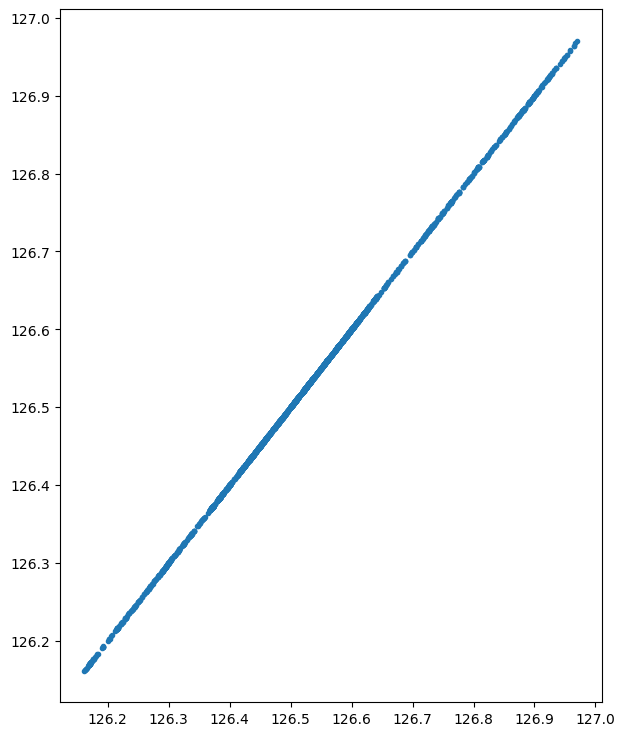

In [147]:
plt.figure(figsize=(7,9))
plt.plot(jeju_df['경도_Lng'],jeju_df['위도_Lat'],'o',markersize=3) # 데이터를 시각화

In [13]:
jeju_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790048 entries, 0 to 790047
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   경도_Lng   790048 non-null  float64
 1   위도_Lat   790048 non-null  float64
 2   행정구역     790048 non-null  object 
 3   경도_Lng2  790048 non-null  object 
 4   위도_Lat2  790048 non-null  object 
dtypes: float64(2), object(3)
memory usage: 30.1+ MB


In [14]:
jeju_df.describe(include='all')

,경도_Lng,위도_Lat,행정구역,경도_Lng2,위도_Lat2
count,790048.000000,790048.000000,790048,790048,790048
unique,NaN,NaN,14,822,484
top,NaN,NaN,서귀포시 표선면,126.525,33.513
freq,NaN,NaN,56432,4606,7532
mean,126.526795,33.413141,NaN,NaN,NaN
std,0.197796,0.147697,NaN,NaN,NaN
min,126.144116,33.113712,NaN,NaN,NaN
25%,126.396301,33.282531,NaN,NaN,NaN
50%,126.530544,33.426677,NaN,NaN,NaN
75%,126.621013,33.504856,NaN,NaN,NaN


### 각 읍면동 별 경계구역사이의 위도-경도 데이터프레임 생성

In [42]:
regions = jeju_df['행정구역'].unique()
lng_lst_new=[]
lat_lst_new=[]
region_lst_new=[]


for region in tqdm(regions):
    grouped=jeju_df[jeju_df['행정구역']==region][['경도_Lng2','위도_Lat2']].groupby('위도_Lat2')
    for key,group in grouped:
        minlng=group['경도_Lng2'].astype(float).min()
        maxlng=group['경도_Lng2'].astype(float).max()
        if maxlng==minlng:
            lng_lst_new.append(maxlng)
            lat_lst_new.append(key)
            region_lst_new.append(region)   
        else:
            for lng in np.arange(minlng,maxlng,.001):
                lng=round(lng,3)
                lng_lst_new.append(lng)
                lat_lst_new.append(key)
                region_lst_new.append(region)       

100%|██████████| 14/14 [00:34<00:00,  2.50s/it]


In [50]:
key=['경도_Lng','위도_Lat','행정구역']

jeju_df_final=pd.DataFrame(dict(zip(key,[lng_lst_new,lat_lst_new,region_lst_new])))
jeju_df_final.head(2)

,경도_Lng,위도_Lat,행정구역
0,126.267,33.114,서귀포시 표선면
1,126.268,33.114,서귀포시 표선면


In [53]:
jeju_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685102 entries, 0 to 2685101
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   경도_Lng  float64
 1   위도_Lat  object 
 2   행정구역    object 
dtypes: float64(1), object(2)
memory usage: 61.5+ MB


### Lng-Lat 컬럼에 경도, 위도 데이터 문자열로 통합해서 생성

In [55]:
jeju_df_final['Lng-Lat']=jeju_df_final['경도_Lng'].astype(str).str.cat(jeju_df_final['위도_Lat'],sep='_')

In [57]:
jeju_df_final=jeju_df_final[['Lng-Lat','경도_Lng','위도_Lat','행정구역']]

In [61]:
jeju_df_final.head()

,Lng-Lat,경도_Lng,위도_Lat,행정구역
0,126.267_33.114,126.267,33.114,서귀포시 표선면
1,126.268_33.114,126.268,33.114,서귀포시 표선면
2,126.269_33.114,126.269,33.114,서귀포시 표선면
3,126.266_33.115,126.266,33.115,서귀포시 표선면
4,126.267_33.115,126.267,33.115,서귀포시 표선면


In [62]:
jeju_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685102 entries, 0 to 2685101
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Lng-Lat  object 
 1   경도_Lng   float64
 2   위도_Lat   object 
 3   행정구역     object 
dtypes: float64(1), object(3)
memory usage: 81.9+ MB


In [64]:
jeju_df_final.describe(include='all')

,Lng-Lat,경도_Lng,위도_Lat,행정구역
count,2685102,2.685102e+06,2685102,2685102
unique,191793,NaN,484,14
top,126.267_33.114,NaN,33.312,서귀포시 표선면
freq,14,NaN,9702,191793
mean,NaN,1.265520e+02,NaN,NaN
std,NaN,1.969845e-01,NaN,NaN
min,NaN,1.261440e+02,NaN,NaN
25%,NaN,1.263880e+02,NaN,NaN
50%,NaN,1.265520e+02,NaN,NaN
75%,NaN,1.267140e+02,NaN,NaN


### 최종 데이터 프레임 csv파일로 추출

In [65]:
jeju_df_final.to_csv('lnglat.csv',index=None)